<a href="https://colab.research.google.com/github/AndrejHorvat1/Multibeam-Forward-Looking-Sonar/blob/main/UATD_CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import shutil
from glob import glob

augmented_base = "/content/drive/MyDrive/UATD_YOLO_Dataset_v2"

clahe_base = "/content/drive/MyDrive/UATD_YOLO_Dataset_CLAHE"
os.makedirs(f"{clahe_base}/images/train", exist_ok=True)
os.makedirs(f"{clahe_base}/images/val", exist_ok=True)
os.makedirs(f"{clahe_base}/labels/train", exist_ok=True)
os.makedirs(f"{clahe_base}/labels/val", exist_ok=True)

for subset in ["train", "val"]:
    image_paths = sorted(glob(os.path.join(augmented_base, f"images/{subset}/*.jpg")))

    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        img_id = os.path.splitext(img_name)[0]

        label_path = os.path.join(augmented_base, f"labels/{subset}/{img_id}.txt")
        if not os.path.exists(label_path):
            continue

        img = cv2.imread(img_path)

        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        clahe_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

        cv2.imwrite(os.path.join(clahe_base, f"images/{subset}/{img_name}"), clahe_img)

        shutil.copy(label_path, os.path.join(clahe_base, f"labels/{subset}/{img_id}.txt"))

        print(f"Obradio: {subset}/{img_name}")

print("\nCLAHE skup spreman na Driveu u:", clahe_base)


Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
Obradio: train/06387.jpg
Obradio: train/06387_aug.jpg
Obradio: train/06389.jpg
Obradio: train/06389_aug.jpg
Obradio: train/06390.jpg
Obradio: train/06390_aug.jpg
Obradio: train/06391.jpg
Obradio: train/06391_aug.jpg
Obradio: train/06392.jpg
Obradio: train/06392_aug.jpg
Obradio: train/06393.jpg
Obradio: train/06393_aug.jpg
Obradio: train/06395.jpg
Obradio: train/06395_aug.jpg
Obradio: train/06397.jpg
Obradio: train/06397_aug.jpg
Obradio: train/06398.jpg
Obradio: train/06398_aug.jpg
Obradio: train/06399.jpg
Obradio: train/06399_aug.jpg
Obradio: train/06400.jpg
Obradio: train/06400_aug.jpg
Obradio: train/06402.jpg
Obradio: train/06402_aug.jpg
Obradio: train/06403.jpg
Obradio: train/06403_aug.jpg
Obradio: train/06404.jpg
Obradio: train/06404_aug.jpg
Obradio: train/06405.jpg
Obradio: train/06405_aug.jpg
Obradio: train/06406.jpg
Obradio: train/06406_aug.jpg
Obradio: train/06408.jpg
Obradio: train/06408_aug.jpg
Obradio: train/06

In [2]:
!cp -r "/content/drive/My Drive/UATD_YOLO_Dataset_CLAHE" /content/
!cp -r "/content/drive/My Drive/UATD_YOLO_Dataset_Test_v2" /content/

In [3]:
#yolov5 konfiguracija
data_yaml = """train: /content/UATD_YOLO_Dataset_CLAHE/images/train
val: /content/UATD_YOLO_Dataset_CLAHE/images/val
nc: 10
test:
  - /content/UATD_YOLO_Dataset_Test_v2/images/test_set1
  - /content/UATD_YOLO_Dataset_Test_v2/images/test_set2
names: ['cube', 'ball', 'cylinder', 'human body', 'plane', 'circle cage', 'square cage', 'metal bucket', 'tyre', 'rov']
"""

os.makedirs("yolo_dataset", exist_ok=True)

with open("yolo_dataset/data.yaml", "w") as f:
    f.write(data_yaml)


In [4]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 237MB/s]



 Epoha 1/15
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_loop, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2119918  ultralytics.nn.modules.head.Detect           [10, [128, 256, 512]]         
Model summary: 129 layers, 11,139,470 parameters, 11,139,454 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 96.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 77.9±17.2 MB/s, size: 340.7 KB)


train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:27<00:00, 446.12it/s]


train: New cache created: /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 61.8±16.5 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:06<00:00, 438.36it/s]


val: New cache created: /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache
Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.96G      1.916      2.337      1.181         12        640: 100%|██████████| 1518/1518 [05:55<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:46<00:00,  4.13it/s]


                   all       3038       4954      0.809      0.747       0.83       0.39

1 epochs completed in 0.113 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.68it/s]


                   all       3038       4954      0.809      0.747      0.829       0.39
                  cube       1050       1052       0.89      0.813      0.898      0.461
                  ball       1210       1212       0.83      0.828      0.863      0.411
              cylinder        226        226      0.792      0.623      0.731      0.314
            human body        556        558      0.743      0.832       0.84       0.37
                 plane        334        334      0.931      0.808      0.916      0.502
           circle cage        282        284      0.663      0.764      0.739      0.362
           square cage        376        376      0.943      0.752      0.899       0.38
          metal bucket        194        194      0.891      0.759      0.874      0.384
                  tyre        454        458      0.532      0.749      0.739      0.382
                   rov        260        260       0.87      0.543      0.796      0.338
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:03<00:00, 443.30it/s]

val: New cache created: /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.43it/s]


                   all       1596       2323      0.721      0.691      0.732      0.293
                  cube        338        338      0.504      0.778      0.681      0.225
                  ball        390        390      0.802      0.872      0.887      0.454
              cylinder         93         93      0.797      0.785        0.8      0.314
            human body        149        149      0.492      0.826      0.731      0.289
                 plane        269        269      0.841       0.87      0.929      0.502
           circle cage        197        197      0.638      0.375      0.458      0.175
           square cage        335        335      0.683      0.464      0.459      0.138
          metal bucket         11         11      0.691      0.636      0.715      0.137
                  tyre        241        241      0.858      0.805      0.892      0.396
                   rov        300        300      0.903      0.499      0.765      0.301
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 647.4±36.9 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.11G      1.863      1.881      1.173         12        640: 100%|██████████| 1518/1518 [05:52<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.41it/s]


                   all       3038       4954      0.857       0.78      0.846       0.39

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:39<00:00,  4.79it/s]


                   all       3038       4954      0.856      0.779      0.846       0.39
                  cube       1050       1052      0.949      0.811      0.923      0.475
                  ball       1210       1212       0.89      0.786      0.864      0.372
              cylinder        226        226      0.822      0.717      0.793      0.345
            human body        556        558      0.887      0.815      0.859      0.364
                 plane        334        334        0.9      0.868      0.936      0.519
           circle cage        282        284      0.852      0.768      0.794      0.386
           square cage        376        376       0.95      0.782      0.897      0.419
          metal bucket        194        194       0.94      0.726      0.885       0.39
                  tyre        454        458      0.596       0.67      0.669      0.343
                   rov        260        260      0.772      0.842      0.836      0.288
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]


                   all       1596       2323      0.794      0.701       0.74      0.291
                  cube        338        338      0.606      0.772      0.585       0.19
                  ball        390        390      0.935      0.849      0.883      0.439
              cylinder         93         93      0.878      0.731      0.866      0.315
            human body        149        149      0.803      0.812      0.839      0.318
                 plane        269        269      0.903      0.896      0.952      0.513
           circle cage        197        197      0.715       0.32      0.473      0.192
           square cage        335        335      0.743      0.483      0.499      0.145
          metal bucket         11         11      0.748      0.636      0.702      0.199
                  tyre        241        241      0.781      0.813      0.852      0.351
                   rov        300        300      0.833        0.7      0.748      0.244
Speed: 0.6ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1134.0±1076.3 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.618      1.052      1.065         12        640: 100%|██████████| 1518/1518 [05:50<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.34it/s]


                   all       3038       4954      0.877      0.818      0.884      0.435

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.63it/s]


                   all       3038       4954      0.877      0.819      0.885      0.435
                  cube       1050       1052      0.921      0.844      0.933      0.493
                  ball       1210       1212      0.906      0.851      0.909      0.441
              cylinder        226        226      0.857       0.74      0.845      0.374
            human body        556        558      0.885      0.894      0.911      0.433
                 plane        334        334      0.927      0.879      0.962      0.564
           circle cage        282        284      0.877      0.799      0.811      0.414
           square cage        376        376      0.952      0.839      0.932       0.45
          metal bucket        194        194      0.935      0.737        0.9      0.422
                  tyre        454        458       0.65      0.753       0.76      0.381
                   rov        260        260      0.864      0.856      0.885      0.372
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.51it/s]


                   all       1596       2323      0.789      0.742       0.78      0.316
                  cube        338        338      0.548      0.831      0.654      0.234
                  ball        390        390      0.873      0.856      0.884      0.442
              cylinder         93         93      0.855      0.656      0.845      0.319
            human body        149        149      0.792      0.866       0.87       0.33
                 plane        269        269      0.867      0.942      0.964      0.547
           circle cage        197        197      0.734       0.36       0.49      0.206
           square cage        335        335      0.728      0.535      0.486      0.147
          metal bucket         11         11      0.896      0.727      0.892      0.223
                  tyre        241        241      0.795       0.83      0.863      0.371
                   rov        300        300      0.806      0.813      0.848      0.339
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 955.1±711.1 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.92G      1.515     0.8812       1.03         12        640: 100%|██████████| 1518/1518 [05:50<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.35it/s]


                   all       3038       4954      0.876      0.827      0.887      0.434

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.67it/s]


                   all       3038       4954      0.876      0.827      0.887      0.434
                  cube       1050       1052      0.945       0.86      0.941      0.489
                  ball       1210       1212      0.906      0.882      0.919      0.467
              cylinder        226        226      0.875      0.699      0.855      0.382
            human body        556        558      0.911      0.842      0.894      0.416
                 plane        334        334      0.865      0.961      0.959      0.536
           circle cage        282        284      0.797      0.838      0.809      0.405
           square cage        376        376      0.964      0.849      0.942      0.453
          metal bucket        194        194      0.946      0.812      0.933      0.431
                  tyre        454        458      0.764      0.718      0.786      0.419
                   rov        260        260      0.789      0.804      0.836      0.341
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.47it/s]


                   all       1596       2323      0.784      0.769      0.786      0.324
                  cube        338        338      0.556      0.846      0.582      0.203
                  ball        390        390      0.835      0.869      0.862      0.435
              cylinder         93         93      0.862      0.699      0.858      0.331
            human body        149        149      0.816      0.832       0.85      0.326
                 plane        269        269      0.808      0.974      0.964      0.517
           circle cage        197        197       0.57      0.477       0.51      0.228
           square cage        335        335      0.818      0.484      0.534      0.162
          metal bucket         11         11      0.911      0.937       0.98      0.294
                  tyre        241        241       0.79      0.809       0.86      0.396
                   rov        300        300       0.87      0.759      0.856      0.346
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 631.8±52.8 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.433     0.7928      1.006         12        640: 100%|██████████| 1518/1518 [05:50<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.35it/s]


                   all       3038       4954      0.894      0.845      0.897      0.451

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.64it/s]


                   all       3038       4954      0.894      0.845      0.897      0.451
                  cube       1050       1052      0.924      0.888      0.934      0.486
                  ball       1210       1212      0.941        0.9       0.94      0.498
              cylinder        226        226      0.801      0.796      0.847      0.377
            human body        556        558      0.917      0.871      0.904      0.447
                 plane        334        334      0.947      0.918      0.974      0.556
           circle cage        282        284       0.85      0.799      0.792      0.418
           square cage        376        376      0.969      0.862      0.929      0.435
          metal bucket        194        194      0.962      0.788      0.926      0.462
                  tyre        454        458      0.792      0.729      0.806      0.438
                   rov        260        260      0.832        0.9      0.921      0.399
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.55it/s]


                   all       1596       2323      0.821      0.776      0.799      0.331
                  cube        338        338      0.612      0.862      0.649      0.229
                  ball        390        390      0.869      0.867      0.869      0.447
              cylinder         93         93      0.875      0.914      0.909      0.335
            human body        149        149      0.833      0.769      0.846      0.317
                 plane        269        269      0.931      0.933      0.966      0.557
           circle cage        197        197      0.748      0.437      0.556      0.231
           square cage        335        335      0.785      0.545      0.545      0.179
          metal bucket         11         11      0.783      0.727      0.831      0.225
                  tyre        241        241      0.897      0.826      0.887       0.39
                   rov        300        300      0.881      0.885      0.929      0.398
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 928.4±999.5 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.371     0.7355     0.9862         12        640: 100%|██████████| 1518/1518 [05:50<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.36it/s]


                   all       3038       4954      0.889      0.829      0.882      0.432

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:41<00:00,  4.63it/s]


                   all       3038       4954      0.888      0.828      0.881      0.432
                  cube       1050       1052      0.913       0.88      0.935      0.476
                  ball       1210       1212      0.931      0.881      0.927      0.493
              cylinder        226        226      0.791      0.785       0.84      0.385
            human body        556        558      0.909      0.877      0.903      0.442
                 plane        334        334      0.946      0.892       0.96      0.516
           circle cage        282        284      0.886      0.785      0.795      0.414
           square cage        376        376      0.977      0.803      0.935       0.45
          metal bucket        194        194      0.958      0.823      0.904      0.417
                  tyre        454        458      0.843      0.729      0.804       0.43
                   rov        260        260      0.725      0.823       0.81      0.295
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.50it/s]


                   all       1596       2323      0.815      0.714      0.755      0.298
                  cube        338        338      0.582       0.82      0.559      0.175
                  ball        390        390      0.928      0.862      0.878      0.451
              cylinder         93         93      0.871      0.654       0.85      0.289
            human body        149        149      0.689      0.859      0.806      0.334
                 plane        269        269      0.934      0.881      0.956       0.52
           circle cage        197        197      0.795      0.354      0.565      0.227
           square cage        335        335       0.72      0.525      0.526      0.153
          metal bucket         11         11      0.922      0.636      0.765      0.158
                  tyre        241        241      0.908      0.776      0.848      0.384
                   rov        300        300      0.804      0.777        0.8      0.288
Speed: 0.6ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 446.9±272.0 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.92G      1.309     0.6917     0.9689         12        640: 100%|██████████| 1518/1518 [05:51<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.38it/s]


                   all       3038       4954      0.908       0.87       0.91      0.466

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.69it/s]


                   all       3038       4954      0.907       0.87       0.91      0.466
                  cube       1050       1052      0.948      0.886      0.939      0.498
                  ball       1210       1212      0.949      0.899      0.947      0.507
              cylinder        226        226      0.842       0.77       0.84      0.399
            human body        556        558      0.896      0.922      0.934      0.465
                 plane        334        334      0.967      0.916      0.957      0.559
           circle cage        282        284      0.893      0.842      0.843      0.453
           square cage        376        376      0.968      0.889      0.935      0.458
          metal bucket        194        194      0.966      0.889      0.939      0.449
                  tyre        454        458      0.773      0.819      0.857      0.467
                   rov        260        260      0.869      0.865      0.912       0.41
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.50it/s]


                   all       1596       2323      0.794      0.763      0.778      0.324
                  cube        338        338      0.562      0.802      0.536      0.176
                  ball        390        390      0.902      0.879      0.894      0.464
              cylinder         93         93      0.841      0.796      0.861      0.323
            human body        149        149      0.642      0.886      0.826      0.332
                 plane        269        269      0.947      0.933      0.979      0.599
           circle cage        197        197      0.814      0.379      0.568      0.224
           square cage        335        335       0.78      0.546      0.573      0.162
          metal bucket         11         11      0.721      0.706      0.743      0.165
                  tyre        241        241      0.855      0.863      0.885      0.404
                   rov        300        300      0.878      0.842      0.912      0.394
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 867.9±1094.2 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.92G      1.258     0.6563     0.9545         12        640: 100%|██████████| 1518/1518 [05:50<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.41it/s]


                   all       3038       4954      0.913      0.862      0.909      0.456

1 epochs completed in 0.110 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.66it/s]


                   all       3038       4954      0.913      0.863      0.909      0.456
                  cube       1050       1052      0.924      0.866      0.933      0.463
                  ball       1210       1212      0.956      0.904      0.944      0.509
              cylinder        226        226      0.842      0.778      0.854      0.395
            human body        556        558       0.91      0.925      0.921      0.452
                 plane        334        334      0.948      0.898      0.949      0.534
           circle cage        282        284      0.881      0.836      0.823       0.44
           square cage        376        376      0.973      0.873      0.932      0.456
          metal bucket        194        194      0.959      0.839      0.933      0.466
                  tyre        454        458       0.83      0.814      0.862      0.456
                   rov        260        260      0.907      0.895      0.938      0.385
Speed: 0.3ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.51it/s]


                   all       1596       2323      0.795      0.765      0.769      0.295
                  cube        338        338      0.583       0.79       0.53      0.167
                  ball        390        390      0.864      0.877      0.871      0.431
              cylinder         93         93      0.859      0.718      0.842      0.294
            human body        149        149      0.668      0.872      0.796      0.314
                 plane        269        269      0.936      0.944      0.963      0.533
           circle cage        197        197      0.756      0.426      0.542       0.21
           square cage        335        335      0.745      0.549      0.521      0.135
          metal bucket         11         11      0.828      0.876      0.892       0.15
                  tyre        241        241      0.874      0.763      0.851      0.356
                   rov        300        300      0.842       0.83       0.88      0.358
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.5±3.2 ms, read: 548.1±285.4 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.95G      1.207     0.6263     0.9409         12        640: 100%|██████████| 1518/1518 [05:51<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:42<00:00,  4.45it/s]


                   all       3038       4954      0.899      0.859      0.897      0.443

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:41<00:00,  4.62it/s]


                   all       3038       4954        0.9      0.859      0.897      0.443
                  cube       1050       1052      0.898      0.877      0.927      0.471
                  ball       1210       1212       0.94       0.91      0.934      0.488
              cylinder        226        226      0.931       0.72      0.869       0.42
            human body        556        558      0.899      0.907      0.907      0.439
                 plane        334        334      0.911      0.931      0.955      0.527
           circle cage        282        284      0.877      0.824      0.815      0.418
           square cage        376        376      0.974       0.89      0.945      0.439
          metal bucket        194        194      0.926      0.903      0.931       0.45
                  tyre        454        458      0.806      0.786      0.838      0.435
                   rov        260        260      0.837      0.838       0.85      0.347
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:25<00:00,  7.81it/s]


                   all       1596       2323      0.777      0.752      0.757      0.302
                  cube        338        338      0.535      0.831      0.544      0.185
                  ball        390        390      0.792      0.874      0.829      0.408
              cylinder         93         93      0.981      0.562      0.918      0.325
            human body        149        149      0.631      0.846      0.748      0.286
                 plane        269        269      0.899      0.952       0.97      0.523
           circle cage        197        197      0.712      0.452      0.489        0.2
           square cage        335        335      0.748      0.558      0.528      0.161
          metal bucket         11         11      0.824      0.854      0.823        0.2
                  tyre        241        241       0.82      0.768       0.85      0.376
                   rov        300        300      0.825      0.827      0.866      0.355
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1036.5±844.6 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.91G      1.174     0.6052     0.9302         12        640: 100%|██████████| 1518/1518 [05:51<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.36it/s]


                   all       3038       4954      0.915      0.864       0.91      0.458

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:41<00:00,  4.55it/s]


                   all       3038       4954      0.911      0.868       0.91      0.458
                  cube       1050       1052      0.897      0.907      0.931      0.472
                  ball       1210       1212      0.951      0.903      0.948      0.505
              cylinder        226        226      0.884      0.677      0.848      0.406
            human body        556        558      0.901      0.923      0.927      0.457
                 plane        334        334      0.936      0.969      0.978      0.565
           circle cage        282        284       0.88      0.854      0.828      0.426
           square cage        376        376      0.966      0.888      0.936      0.445
          metal bucket        194        194      0.928      0.897      0.934       0.44
                  tyre        454        458      0.855      0.819      0.864      0.467
                   rov        260        260      0.908      0.838      0.905      0.396
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.53it/s]


                   all       1596       2323      0.787      0.735      0.752      0.301
                  cube        338        338      0.542      0.876      0.559      0.178
                  ball        390        390      0.865      0.877      0.881      0.427
              cylinder         93         93      0.929      0.559      0.831      0.289
            human body        149        149      0.674      0.906      0.805      0.289
                 plane        269        269      0.906      0.963      0.964      0.556
           circle cage        197        197      0.665      0.396      0.502      0.202
           square cage        335        335       0.76      0.546      0.533      0.167
          metal bucket         11         11      0.769      0.727      0.744      0.159
                  tyre        241        241      0.878      0.755      0.837      0.391
                   rov        300        300      0.882       0.75      0.866      0.351
Speed: 0.6ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 922.4±672.0 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.138     0.5832     0.9209         12        640: 100%|██████████| 1518/1518 [05:52<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.40it/s]


                   all       3038       4954      0.908      0.845      0.898      0.445

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:41<00:00,  4.57it/s]


                   all       3038       4954       0.91      0.844      0.898      0.445
                  cube       1050       1052      0.916       0.89      0.934      0.478
                  ball       1210       1212      0.959      0.891      0.941      0.492
              cylinder        226        226      0.889      0.593      0.826      0.371
            human body        556        558      0.917       0.91      0.916      0.416
                 plane        334        334      0.928      0.934      0.959      0.573
           circle cage        282        284       0.89      0.849      0.838      0.439
           square cage        376        376      0.965       0.87      0.944      0.451
          metal bucket        194        194      0.961      0.891      0.935      0.448
                  tyre        454        458      0.876      0.766      0.846       0.45
                   rov        260        260      0.802      0.846      0.835       0.33
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.55it/s]


                   all       1596       2323      0.817      0.717      0.756      0.299
                  cube        338        338      0.555      0.789      0.525      0.177
                  ball        390        390      0.936      0.877      0.886      0.428
              cylinder         93         93      0.916       0.47      0.815      0.286
            human body        149        149      0.749      0.832      0.773      0.304
                 plane        269        269      0.938      0.959       0.97      0.571
           circle cage        197        197      0.765      0.437      0.553       0.21
           square cage        335        335      0.724      0.493      0.489      0.138
          metal bucket         11         11      0.841      0.727       0.83      0.199
                  tyre        241        241      0.891      0.784      0.852      0.346
                   rov        300        300      0.854      0.797      0.868      0.329
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 563.6±300.2 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.92G      1.102     0.5656     0.9128         12        640: 100%|██████████| 1518/1518 [05:50<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:44<00:00,  4.28it/s]


                   all       3038       4954      0.898      0.865      0.907      0.453

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.68it/s]


                   all       3038       4954      0.899      0.864      0.907      0.453
                  cube       1050       1052        0.9      0.899       0.94       0.49
                  ball       1210       1212      0.928      0.917      0.939      0.491
              cylinder        226        226      0.886      0.687      0.837      0.383
            human body        556        558      0.906      0.909      0.924      0.433
                 plane        334        334      0.954      0.928      0.967      0.568
           circle cage        282        284      0.841      0.859      0.844      0.428
           square cage        376        376      0.983      0.894      0.942      0.457
          metal bucket        194        194      0.953      0.881      0.941      0.459
                  tyre        454        458      0.799      0.806      0.851      0.449
                   rov        260        260      0.843      0.858      0.884      0.373
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.59it/s]


                   all       1596       2323      0.809      0.742      0.756      0.303
                  cube        338        338      0.575      0.841      0.542      0.189
                  ball        390        390      0.839      0.877      0.852      0.421
              cylinder         93         93      0.865       0.43      0.692      0.246
            human body        149        149      0.681      0.826       0.76      0.303
                 plane        269        269      0.933      0.948      0.967      0.551
           circle cage        197        197      0.718      0.462      0.518      0.204
           square cage        335        335      0.766      0.548      0.527      0.151
          metal bucket         11         11      0.981      0.909      0.981       0.23
                  tyre        241        241      0.871      0.797      0.859      0.391
                   rov        300        300      0.866      0.787      0.857      0.347
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1079.9±929.8 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.92G      1.059     0.5474      0.902         12        640: 100%|██████████| 1518/1518 [05:50<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.41it/s]


                   all       3038       4954       0.92      0.851       0.91      0.462

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.74it/s]


                   all       3038       4954       0.92      0.851       0.91      0.462
                  cube       1050       1052       0.93      0.874      0.945      0.493
                  ball       1210       1212      0.944      0.922      0.943      0.506
              cylinder        226        226      0.892      0.691      0.851      0.407
            human body        556        558      0.908      0.919      0.927      0.437
                 plane        334        334      0.956      0.958      0.974      0.571
           circle cage        282        284      0.911      0.842      0.836      0.448
           square cage        376        376      0.968      0.872      0.933      0.451
          metal bucket        194        194      0.958       0.82      0.937      0.463
                  tyre        454        458      0.865      0.795       0.86      0.455
                   rov        260        260      0.866      0.815      0.888      0.386
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.48it/s]


                   all       1596       2323      0.771      0.758      0.762      0.327
                  cube        338        338       0.55      0.866      0.565      0.211
                  ball        390        390      0.862      0.882       0.88      0.446
              cylinder         93         93      0.678      0.407       0.57      0.219
            human body        149        149      0.583      0.852      0.769      0.273
                 plane        269        269      0.935      0.981      0.983      0.559
           circle cage        197        197      0.742      0.447      0.612      0.254
           square cage        335        335      0.745      0.534      0.542      0.155
          metal bucket         11         11      0.901          1      0.942      0.341
                  tyre        241        241      0.851      0.805      0.872      0.411
                   rov        300        300      0.868      0.808      0.888      0.405
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1066.6±932.1 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.91G      1.037     0.5339     0.8962         12        640: 100%|██████████| 1518/1518 [05:51<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.40it/s]


                   all       3038       4954      0.902      0.843      0.894      0.438

1 epochs completed in 0.111 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:41<00:00,  4.60it/s]


                   all       3038       4954      0.901      0.843      0.894      0.438
                  cube       1050       1052      0.902      0.878       0.93      0.491
                  ball       1210       1212      0.941      0.879      0.926      0.454
              cylinder        226        226      0.929      0.637      0.853      0.388
            human body        556        558      0.863      0.885      0.897      0.421
                 plane        334        334       0.91      0.946      0.951       0.54
           circle cage        282        284      0.898      0.824      0.824      0.429
           square cage        376        376      0.969      0.908      0.944      0.445
          metal bucket        194        194      0.923      0.892      0.921      0.449
                  tyre        454        458      0.818      0.788      0.841      0.436
                   rov        260        260      0.859      0.796      0.852      0.323
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:26<00:00,  7.66it/s]


                   all       1596       2323      0.822      0.756      0.765      0.319
                  cube        338        338      0.592       0.85      0.576      0.208
                  ball        390        390      0.893      0.864      0.865      0.413
              cylinder         93         93      0.927      0.682      0.842      0.357
            human body        149        149      0.721      0.879      0.845       0.34
                 plane        269        269       0.91      0.959      0.978       0.56
           circle cage        197        197      0.735      0.464      0.547      0.216
           square cage        335        335      0.714      0.531      0.473      0.138
          metal bucket         11         11          1      0.812      0.846      0.295
                  tyre        241        241      0.823      0.813      0.826      0.336
                   rov        300        300       0.91      0.709       0.85      0.329
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/train.cache... 12140 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12140/12140 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 808.1±1172.2 MB/s, size: 439.4 KB)


val: Scanning /content/UATD_YOLO_Dataset_CLAHE/labels/val.cache... 3038 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3038/3038 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.92G       1.01     0.5207      0.891         12        640: 100%|██████████| 1518/1518 [05:55<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:43<00:00,  4.37it/s]


                   all       3038       4954      0.906       0.86      0.908      0.455

1 epochs completed in 0.112 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 190/190 [00:40<00:00,  4.70it/s]


                   all       3038       4954      0.906      0.861      0.908      0.455
                  cube       1050       1052      0.908      0.908      0.937      0.494
                  ball       1210       1212      0.951      0.899      0.931      0.473
              cylinder        226        226      0.894      0.708      0.852      0.379
            human body        556        558       0.89      0.891      0.914      0.415
                 plane        334        334      0.916      0.958      0.967      0.575
           circle cage        282        284      0.901      0.845      0.842      0.442
           square cage        376        376      0.976      0.852      0.946      0.472
          metal bucket        194        194      0.936      0.902      0.961      0.484
                  tyre        454        458      0.837      0.803      0.853      0.452
                   rov        260        260       0.85      0.838      0.875      0.363
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:25<00:00,  7.79it/s]


                   all       1596       2323      0.824      0.718      0.768      0.326
                  cube        338        338      0.517      0.858       0.55       0.21
                  ball        390        390      0.912      0.859      0.887      0.429
              cylinder         93         93      0.868      0.564      0.748      0.277
            human body        149        149      0.777      0.846      0.837      0.331
                 plane        269        269      0.887      0.967      0.969       0.56
           circle cage        197        197      0.796      0.416      0.585      0.238
           square cage        335        335      0.747      0.442      0.521       0.16
          metal bucket         11         11      0.968      0.727      0.876      0.271
                  tyre        241        241      0.831      0.793      0.855      0.389
                   rov        300        300      0.934      0.706      0.857       0.39
Speed: 0.4ms preproce

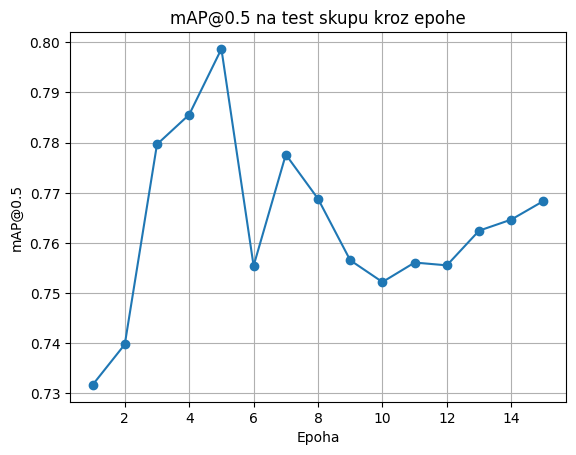

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import shutil
import os

# Konfiguracija
DATA_YAML_PATH = "yolo_dataset/data.yaml"
BEST_MODEL_PATH = "best_yolov8.pt"
INITIAL_WEIGHTS = "yolov8s.pt"
EPOCHS = 15

# Inicijaliziraj model
model = YOLO(INITIAL_WEIGHTS)
map_scores = []
best_map = 0.0

# Loop po epohama
for epoch in range(EPOCHS):
    print(f"\n Epoha {epoch + 1}/{EPOCHS}")

    # Treniraj samo 1 epohu
    model.train(data=DATA_YAML_PATH, epochs=1, batch=8, imgsz=640, project="runs", name="custom_loop", verbose=True, exist_ok=True)

    # Validacija na test skupu
    metrics = model.val(data=DATA_YAML_PATH, split="test", imgsz=640, batch=8)

    # Dohvati mAP@0.5 i dodaj u listu
    map_50 = metrics.box.map50  # float
    print(f"mAP@0.5 test: {map_50:.4f}")
    map_scores.append(map_50)


# Plotanje rezultata
plt.plot(range(1, EPOCHS + 1), map_scores, marker='o')
plt.title("mAP@0.5 na test skupu kroz epohe")
plt.xlabel("Epoha")
plt.ylabel("mAP@0.5")
plt.grid(True)
plt.show()


!cp -r runs/custom_loop /content/drive/MyDrive/yolov8_CLAHE/